output is tuple for servo rotations in radians:

(alpha left and right, alpha up and down, beta up and down, gamma up and down, gamma left and right, gripper)

all units are m or rad unless specified


In [9]:
from math import atan, pi, asin, acos, cos
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class servo_control(object):

  offsets, scalings = (0, 0), (1, 1)  # (x,y)

  def __init__(self):
    if input("Calibrate arm? (y/n) ") == "y":
      self.calibrate()

  def calibrate(self):

    def get_calibration_image():  # placeholder function
      return np.zeros((100, 100))

    image = get_calibration_image()

    a, b, c, d = input("what are the real positions in m of the dots in the image? (in format: 'x, y, x, y') ").split(", ")
    real1, real2 = (float(a), float(b)), (float(c), float(d))

    exit = False
    while not exit:
      a, b, c, d = input("What are the positions in pixels of the dots in the image? (in format: 'x, y, x, y') ").split(", ")
      image1, image2 = (float(a), float(b)), (float(c), float(d))

      plt.imshow(image)
      plt.scatter([int(a), int(c)], [int(b), int(d)])
      plt.show()

      exit = input("Would you like to change these values? (y/n) ") != "y"

    plt.imshow(image)
    plt.scatter([int(a), int(c)], [int(b), int(d)])
    plt.show()
    
    try:
      scalingx = (real1[0] - real2[0]) / (image1[0] - image2[0])
      scalingy = (real1[1] - real2[1]) / (image1[1] - image2[1])
    except:
      raise ValueError("division by zero due to points being aligned in x or y. Try again with different image x,y values")
    mean_scaling = (scalingx + scalingy) / 2
    scalings = (mean_scaling, mean_scaling)

    offsetx_1 = real1[0] - (image1[0] * scalings[0])
    offsetx_2 = real2[0] - (image2[0] * scalings[0])
    mean_offsetx = (offsetx_1 + offsetx_2) / 2

    offsety_1 = real1[1] - (image1[1] * scalings[1])
    offsety_2 = real2[1] - (image2[1] * scalings[1])
    mean_offsety = (offsety_1 + offsety_2) / 2

    offsets = (mean_offsetx, mean_offsety)
    
    self.scalings, self.offsets = scalings, offsets

    return offsets, scalings

  def get_rotations(self, x, y, z, r, g, a=0.07, image_height=1):  # g is grabber servo rotation

    y = image_height - y
    s = (x**2 + y**2)**0.5  # s is r in polar
    theta = atan(y/x)

    alpha, beta = 0, 0 # solve the equations from the email
    gamma = 3*pi/2 - alpha - beta

    return (theta, alpha, beta, gamma, r, g)

  def get_route(self, x, y, r, z=0.04):  # x,y in pixels
    x = self.offsets[0] + self.scalings[0]*x
    y = self.offsets[1] + self.scalings[1]*y

    # create route then call get_rotations sequentially
    # return list of tuples where each tuple is a set of rotations
    # that need to be moved to in sequence

    return

Calibrate arm? (y/n) y
what are the real positions in m of the dots in the image? (in format: 'x, y, x, y') 0.5, 0.4, 0.6, 0.4
What are the positions in pixels of the dots in the image? (in format: 'x, y, x, y') 40, 40, 50, 50


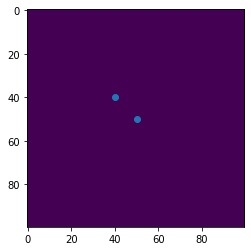

Would you like to change these values? (y/n) n


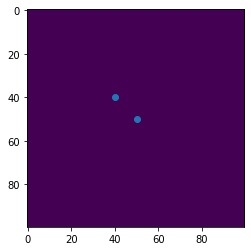

In [6]:
test = servo_control()

In [7]:
test.offsets

(0.325, 0.17500000000000004)

In [8]:
test.scalings

(0.004999999999999999, 0.004999999999999999)

In [14]:
r = 0.4
a = 0.1
z = 0.1
x = 0.4
y = 0.35

b = r**2 + (a+z)**2
alpha = pi - asin((x**2 - y**2 + b)/(2*x*b**0.5)) - atan(r/(a+z))
beta = acos((x*cos(alpha)-r)/y) - alpha
gamma = 1.5 * pi - alpha - beta

alpha, beta, gamma

(1.308512036340724, 1.2717145635277478, 2.1321623805162178)

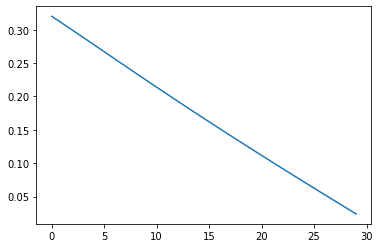

In [19]:
from math import sin, cos
import matplotlib.pyplot as plt
losses = []
for r in range(10, 40):
  b = (r/100)**2 + (a+z)**2
  alpha = pi - asin((x**2 - y**2 + b)/(2*x*(b**0.5))) - atan((r/100)/(a+z))
  beta = acos((x*cos(alpha)-(r/100))/y) - alpha
  r_new = x*sin(alpha) + y*cos(180-alpha-beta)
  losses.append(abs((r/100) - r_new))
plt.plot(losses)